In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [65]:
filepath = os.path.join("vg_sales.csv")

df = pd.read_csv(filepath)
df = df.dropna()
df = df.drop_duplicates()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [66]:
#df = df.drop(columns=['Name'], axis=1)

In [67]:
df['User_Score'] = pd.to_numeric(df['User_Score'])

X = df.drop('User_Score', axis=1)
y = df['User_Score']

In [68]:
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(X)

In [69]:
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_transform, y)

score = model.score(X_transform, y)
print(f"R2 Score: {score}")

R2 Score: 0.9505122558571583


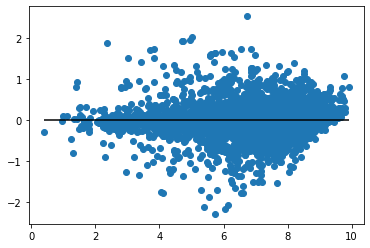

In [71]:
predictions = model.predict(X_transform)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()